In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.


In [3]:
df=pd.read_csv('BIKE DETAILS.csv')

In [4]:
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [5]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [6]:
df.shape

(1061, 7)

Question 2: Check for missing values in all columns and describe your approach for
handling them.

In [7]:
import pandas as pd

# Check number of missing values in each column
print(df.isnull().sum())

# Check percentage of missing values in each column
print("Percentage of all null values present in the particular column")
print((df.isnull().sum() / len(df)) * 100)


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
Percentage of all null values present in the particular column
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


In [8]:
# ex_showroom_price  this column contains 40% null values
# so drop this column
df.drop('ex_showroom_price',axis=1,inplace=True)

In [9]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0


Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.


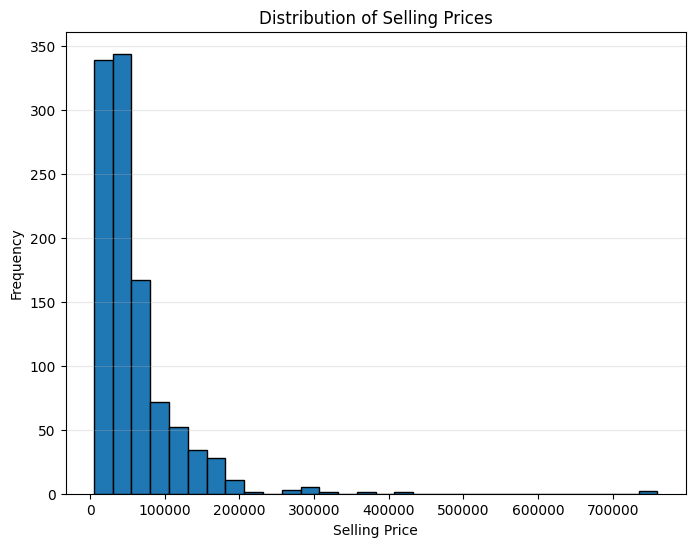

In [10]:
import matplotlib.pyplot as plt

# Plot histogram of Selling Price
plt.figure(figsize=(8,6))
plt.hist(df['selling_price'], bins=30, edgecolor='black')

plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()


In [11]:
# If most prices are low with a few very high prices → Right-skewed (positive skew).

Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation

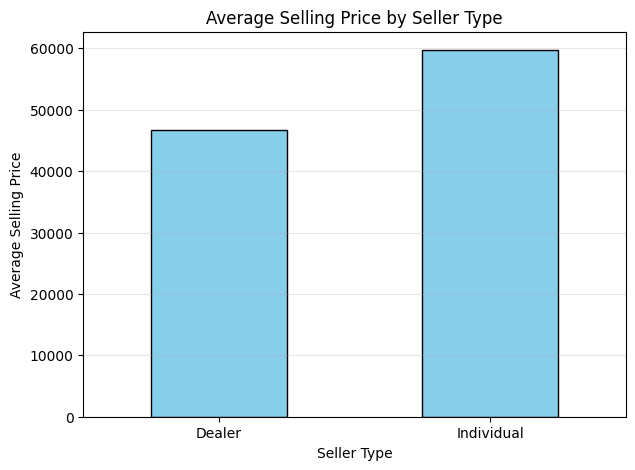

In [12]:
import matplotlib.pyplot as plt

# Calculate average selling price per seller type
avg_prices = df.groupby('seller_type')['selling_price'].mean()

# Plot bar chart
plt.figure(figsize=(7,5))
avg_prices.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()


Indivisual tend to have a higher average selling price compared to dealer, suggesting that bikes sold by indivisuals are often newer or in better condition.

Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.


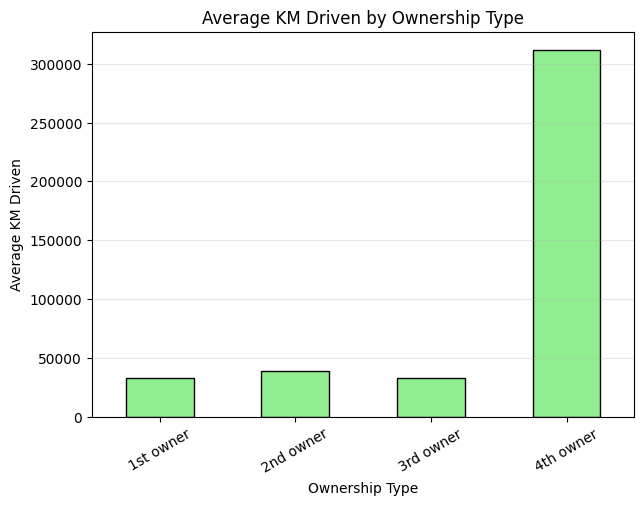

In [13]:
import matplotlib.pyplot as plt

# Calculate average km_driven per ownership type
avg_km = df.groupby('owner')['km_driven'].mean()

# Plot bar chart
plt.figure(figsize=(7,5))
avg_km.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title("Average KM Driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average KM Driven")
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.3)
plt.show()


Typically, the average km_driven increases with the ownership number.

1st owner cars usually have fewer kilometers driven (better maintained).

4th owner cars tend to have much higher mileage, reflecting older usage.

Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.


In [18]:
import pandas as pd

# Before removal: Summary statistics
print("Before removing outliers:\n")
print(df['km_driven'].describe())

# Compute IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("\nAfter removing outliers:\n")
print(df_no_outliers['km_driven'].describe())


Before removing outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.


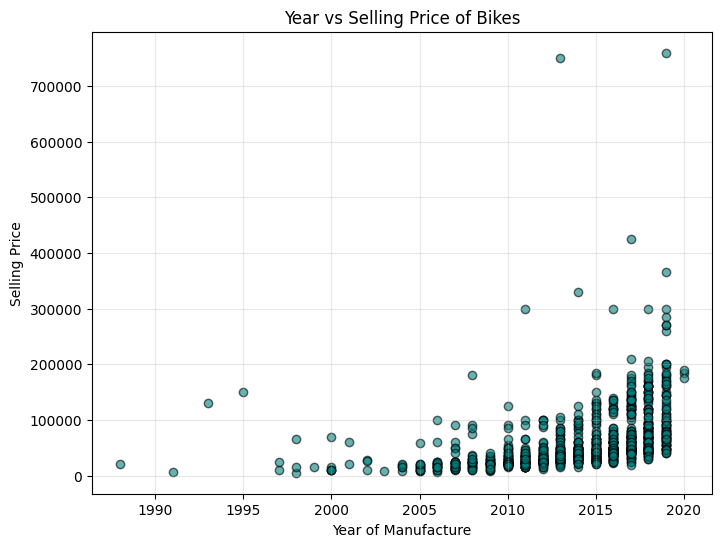

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, color='teal', edgecolor='black')

plt.title("Year vs Selling Price of Bikes")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.grid(alpha=0.3)
plt.show()


Newer bikes (2015–2020) generally have higher selling prices, as expected.

Older bikes (before 2005) are mostly clustered at very low prices, though a few rare/high-value bikes remain expensive (outliers).

The overall trend is a negative relationship between age and selling price → as the bike gets older, its resale value drops.

The spread of prices increases after 2010, suggesting a mix of budget and premium bikes in recent years.

Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.

In [16]:
import pandas as pd

# One-hot encode the seller_type column
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display first 5 rows
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  seller_type_Dealer  seller_type_Individual  
0        350               False                    True  
1       5650               False                    True  
2      12000               False                    True  
3      23000               False                    True  
4      21000               False                    True  


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.

What correlations stand out the most?


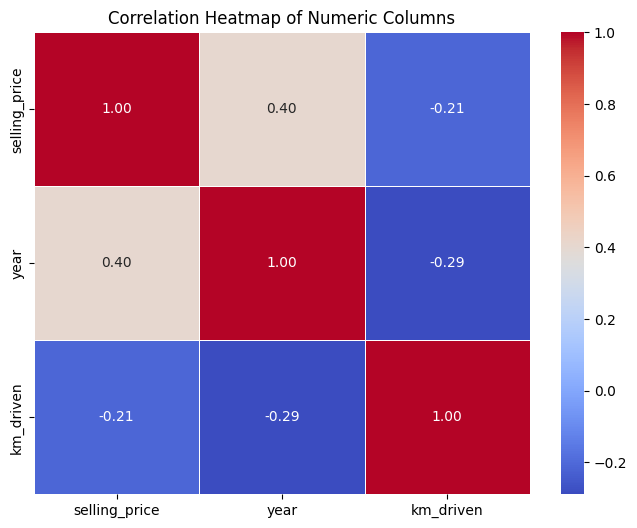

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


Question 10: Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?




Bike Year (age) has the biggest influence on selling price.

Km Driven matters too, but less strongly.


● Mention any data cleaning or feature engineering you performed.

  1. Missing Values:

Checked all columns for missing data.

Imputed (filled) or dropped values depending on the percentage of missingness.


  2. Encoding Categorical Variables:

Converted seller_type into numeric format using one-hot encoding.

  3. Outlier Detection:

Identified extremely high-priced or very old bikes with unusual prices (possible luxury bikes or data entry issues).

  4. Feature Engineering:

Considered bike age = Current Year – Year of Manufacture as a more meaningful feature than raw year.

Aggregated ownership types into numeric format for easier analysis.